<a href="https://colab.research.google.com/github/Ciiku-Kihara/KIRA-PLASTININA-UNSUPERVISED-ML-PROJECT-WITH-R/blob/main/Advertising_Independent_Project_in_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Defining the Question

## a) Specifying the analysis question

Perform data cleaning and exploratory data analysis effectively in R and help my client identify which individuals are most likely to click on her ads. 

## b) Defining the metric for success

Be able to effectively clean the dataset, perform thorough univariate and bivariate exploratory data analysis and give appropriate recommendations to the client based on the insights obtained from the analysis.
Build a model that identifies which individual is most likely to click on an ad with at least 90% accuracy

## c) Understanding the context

My client has created an online cryptography course and would want to advertise it on her blog. She currently targets audiences originating from various countries. In the past, she ran ads to advertise a related course on the same blog and collected data in the process.

Cryptography is associated with the process of converting ordinary plain text into unintelligible text and vice-versa. It is a method of storing and transmitting data in a particular form so that only those for whom it is intended can read and process it.

The demand across all industries for increased computer security is growing, and cryptography is a subcategory within the career field of information security.

In Kenya, it is a fairly new but promising career path to venture into.
There are still not many institutions offering high quality cyber security courses in Kenya and therefore the opportunities to offer courses in cryptography with a high intake are numerous.

## d) Recording the experimental design

- Read and explore the given dataset
- Define the appropriateness of the available data to answer the given question
- Find and deal with outliers, anomalies, and missing data within the dataset
- Perform univariate and bivariate data analysis
- Build a machine learning model
- Provide conclusions and recommendations from my insights

## e) Data Relevance

The dataset adequate to perform data analysis

# 2. Installing and importing relevant libraries

In [ ]:
# Installing the necessary packages

install.packages(c("tidyverse", "data.table", "Hmisc", "moments", "tidymodels", "caret", "e1071", "kernlab", "party"))

In [ ]:
# Loading the packages

library(tidyverse)
library(data.table)
library(Hmisc)
library(moments)
library(tidymodels)
library(caret)
library(e1071)
library(kernlab)
library(party)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.1     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose


Loading required package: lattice

Loading required package: survival

Loading required package: Formula


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:dplyr’:

    src, summarize


The following objects are masked from ‘package:base’:

    format.pval, units


Registered S3 method overwritte

# 3. Loading and checking the data

In [ ]:
# Reading the csv file

ad = read.csv("advertising.csv")

In [ ]:
# Viewing the first 6 rows of the dataset

head(ad)

,Daily.Time.Spent.on.Site,Age,Area.Income,Daily.Internet.Usage,Ad.Topic.Line,City,Male,Country,Timestamp,Clicked.on.Ad
,<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<int>
1,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
2,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
3,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
4,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
5,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
6,59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0


In [ ]:
# Getting the dimensions of the data

dim(ad)

# The data contains 1000 rows and 10 columns

[1] 1000   10

In [ ]:
# Viewing the column names

colnames(ad)

[1] "Daily.Time.Spent.on.Site" "Age"                     
 [3] "Area.Income"              "Daily.Internet.Usage"    
 [5] "Ad.Topic.Line"            "City"                    
 [7] "Male"                     "Country"                 
 [9] "Timestamp"                "Clicked.on.Ad"

In [ ]:
# Viewing the structure of the data

glimpse(ad)

# 3 of the variables contain float values, 3 are integer variables and 4 are character variables

Rows: 1,000
Columns: 10
$ Daily.Time.Spent.on.Site <dbl> 68.95, 80.23, 69.47, 74.15, 68.37, 59.99, 88.…
$ Age                      <int> 35, 31, 26, 29, 35, 23, 33, 48, 30, 20, 49, 3…
$ Area.Income              <dbl> 61833.90, 68441.85, 59785.94, 54806.18, 73889…
$ Daily.Internet.Usage     <dbl> 256.09, 193.77, 236.50, 245.89, 225.58, 226.7…
$ Ad.Topic.Line            <chr> "Cloned 5thgeneration orchestration", "Monito…
$ City                     <chr> "Wrightburgh", "West Jodi", "Davidton", "West…
$ Male                     <int> 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, …
$ Country                  <chr> "Tunisia", "Nauru", "San Marino", "Italy", "I…
$ Timestamp                <chr> "2016-03-27 00:53:11", "2016-04-04 01:39:02",…
$ Clicked.on.Ad            <int> 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, …


# 4. External data source validation 

The data can be validated by clicking on the following link: https://www.kaggle.com/farhanmd29/predicting-customer-ad-clicks

# 5. Data cleaning

In [ ]:
# Checking the number of missing values in each column

colSums(is.na(ad))

# There are no missing values in the data

Daily.Time.Spent.on.Site                      Age              Area.Income 
                       0                        0                        0 
    Daily.Internet.Usage            Ad.Topic.Line                     City 
                       0                        0                        0 
                    Male                  Country                Timestamp 
                       0                        0                        0 
           Clicked.on.Ad 
                       0

In [ ]:
# Looking for duplicates in the data

sum(duplicated(ad))

# There are no duplicated rows

[1] 0

In [ ]:
# Changing the timestamp column to datetime and splitting creating new columns 'date' and 'time'

ad$date = as.Date(ad$Timestamp)
ad$time <- format(as.POSIXct(ad$Timestamp), format = "%H:%M:%S")

str(ad)

'data.frame':	1000 obs. of  12 variables:
 $ Daily.Time.Spent.on.Site: num  69 80.2 69.5 74.2 68.4 ...
 $ Age                     : int  35 31 26 29 35 23 33 48 30 20 ...
 $ Area.Income             : num  61834 68442 59786 54806 73890 ...
 $ Daily.Internet.Usage    : num  256 194 236 246 226 ...
 $ Ad.Topic.Line           : chr  "Cloned 5thgeneration orchestration" "Monitored national standardization" "Organic bottom-line service-desk" "Triple-buffered reciprocal time-frame" ...
 $ City                    : chr  "Wrightburgh" "West Jodi" "Davidton" "West Terrifurt" ...
 $ Male                    : int  0 1 0 1 0 1 0 1 1 1 ...
 $ Country                 : chr  "Tunisia" "Nauru" "San Marino" "Italy" ...
 $ Timestamp               : chr  "2016-03-27 00:53:11" "2016-04-04 01:39:02" "2016-03-13 20:35:42" "2016-01-10 02:31:19" ...
 $ Clicked.on.Ad           : int  0 0 0 0 0 0 0 1 0 0 ...
 $ date                    : Date, format: "2016-03-27" "2016-04-04" ...
 $ time                    : chr

In [ ]:
# Feature extraction.
# Getting the hour from the time variable

ad_sep <- ad %>% separate(time, c("Hour", "Minutes", "Seconds"))

head(ad_sep)

,Daily.Time.Spent.on.Site,Age,Area.Income,Daily.Internet.Usage,Ad.Topic.Line,City,Male,Country,Timestamp,Clicked.on.Ad,date,Hour,Minutes,Seconds
,<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<date>,<chr>,<chr>,<chr>
1,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,2016-03-27,00,53,11
2,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,2016-04-04,01,39,02
3,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,2016-03-13,20,35,42
4,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,2016-01-10,02,31,19
5,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,2016-06-03,03,36,18
6,59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0,2016-05-19,14,30,17


In [ ]:
# Encoding the hour variable

ad_sep$Hour = ifelse(ad_sep$Hour >= "00" & ad_sep$Hour <= "05" ,"small hours",
              ifelse(ad_sep$Hour >= "06" & ad_sep$Hour <= "11" ,"morning",
              ifelse(ad_sep$Hour >= "12" & ad_sep$Hour <= "17" ,"Afternoon","Evening")))

head(ad_sep)

,Daily.Time.Spent.on.Site,Age,Area.Income,Daily.Internet.Usage,Ad.Topic.Line,City,Male,Country,Timestamp,Clicked.on.Ad,date,Hour,Minutes,Seconds
,<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<date>,<chr>,<chr>,<chr>
1,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,2016-03-27,small hours,53,11
2,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,2016-04-04,small hours,39,02
3,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,2016-03-13,Evening,35,42
4,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,2016-01-10,small hours,31,19
5,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,2016-06-03,small hours,36,18
6,59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0,2016-05-19,Afternoon,30,17


In [ ]:
# Dropping the Ad topic line, minutes, seconds, city and date columns because they
# will not be necessary for the analysis

ad_sep = select(ad_sep, -c(Ad.Topic.Line, Minutes, Seconds, City, date))

head(ad_sep)

,Daily.Time.Spent.on.Site,Age,Area.Income,Daily.Internet.Usage,Male,Country,Timestamp,Clicked.on.Ad,Hour
,<dbl>,<int>,<dbl>,<dbl>,<int>,<chr>,<chr>,<int>,<chr>
1,68.95,35,61833.90,256.09,0,Tunisia,2016-03-27 00:53:11,0,small hours
2,80.23,31,68441.85,193.77,1,Nauru,2016-04-04 01:39:02,0,small hours
3,69.47,26,59785.94,236.50,0,San Marino,2016-03-13 20:35:42,0,Evening
4,74.15,29,54806.18,245.89,1,Italy,2016-01-10 02:31:19,0,small hours
5,68.37,35,73889.99,225.58,0,Iceland,2016-06-03 03:36:18,0,small hours
6,59.99,23,59761.56,226.74,1,Norway,2016-05-19 14:30:17,0,Afternoon


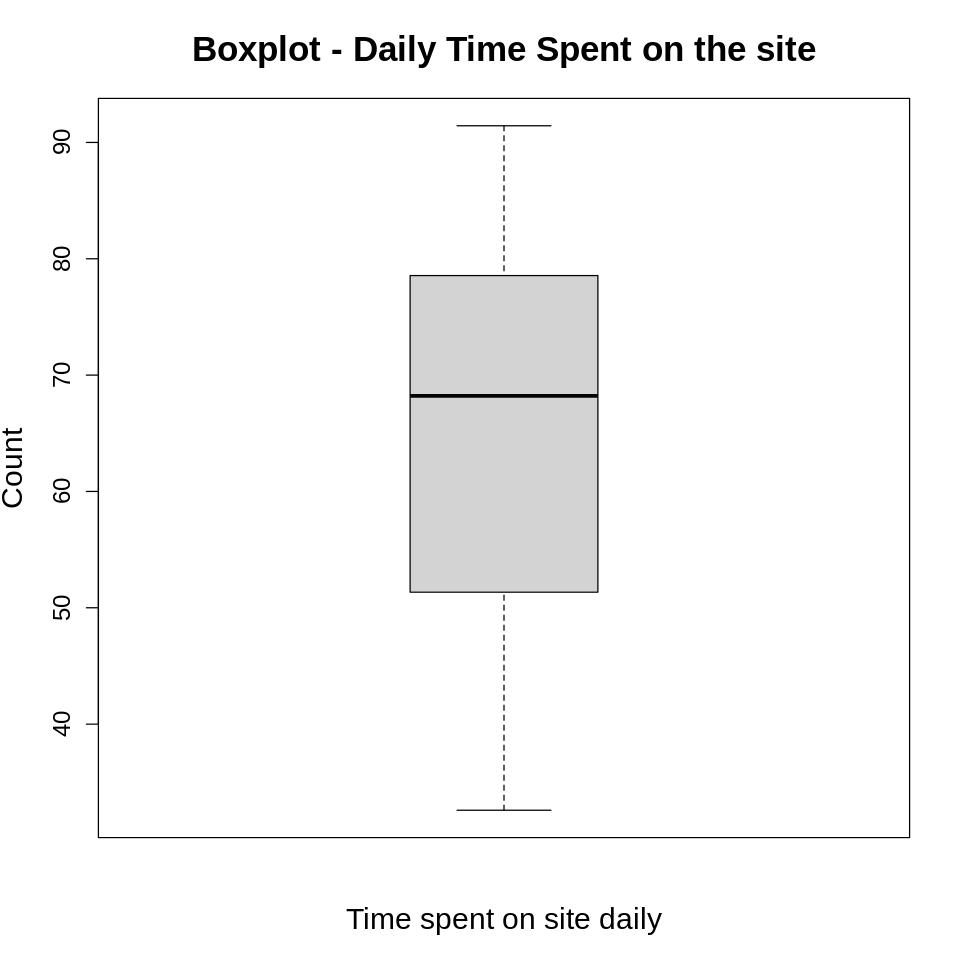

In [ ]:
# Checking for outliers in the numeric columns
# Outliers in the daily time spent column

options(repr.plot.width = 8, repr.plot.height = 8)
boxplot(ad_sep$Daily.Time.Spent.on.Site, main="Boxplot - Daily Time Spent on the site", xlab = "Time spent on site daily", ylab = "Count", 
boxwex=0.5, cex.main= 1.75, cex.lab=1.5, cex.axis=1.2)

# There are no outliers in this column

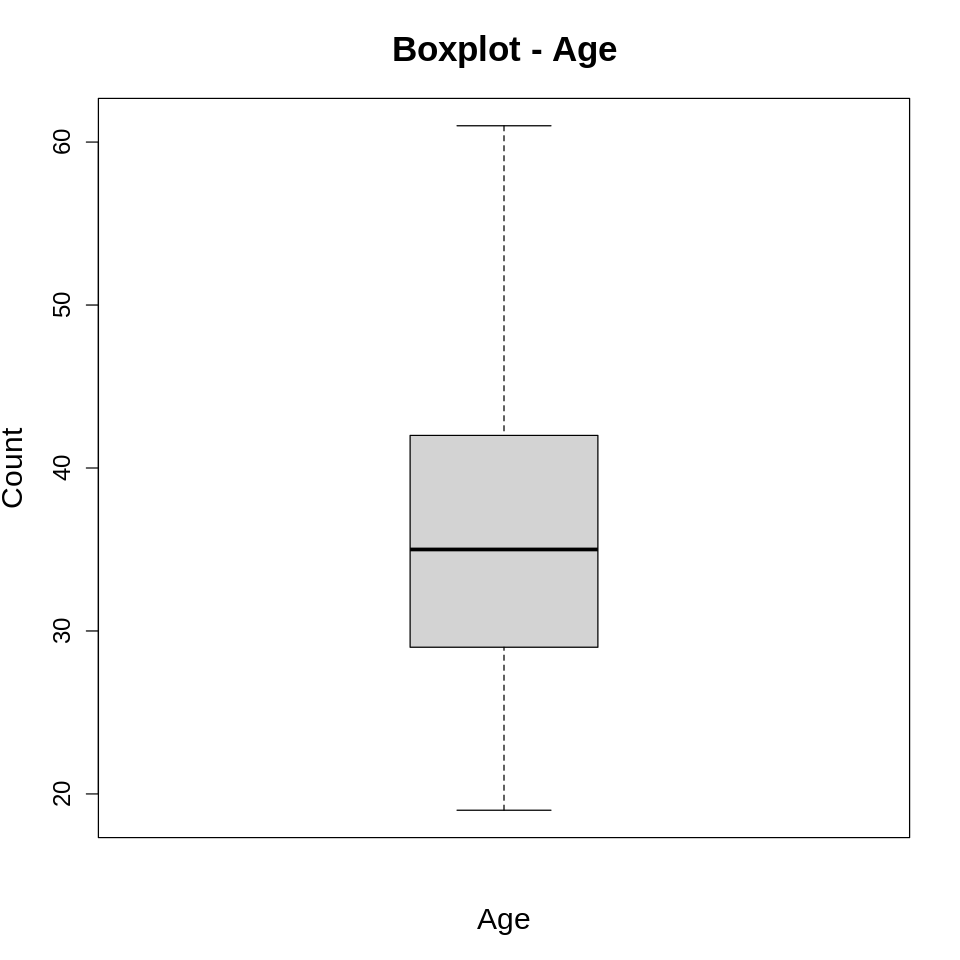

In [ ]:
# Outliers in the age column

options(repr.plot.width = 8, repr.plot.height = 8)
boxplot(ad_sep$Age, main="Boxplot - Age", xlab = "Age", ylab = "Count",
boxwex=0.5, cex.main= 1.75, cex.lab=1.5, cex.axis=1.2)

# There are no outliers in the Age column

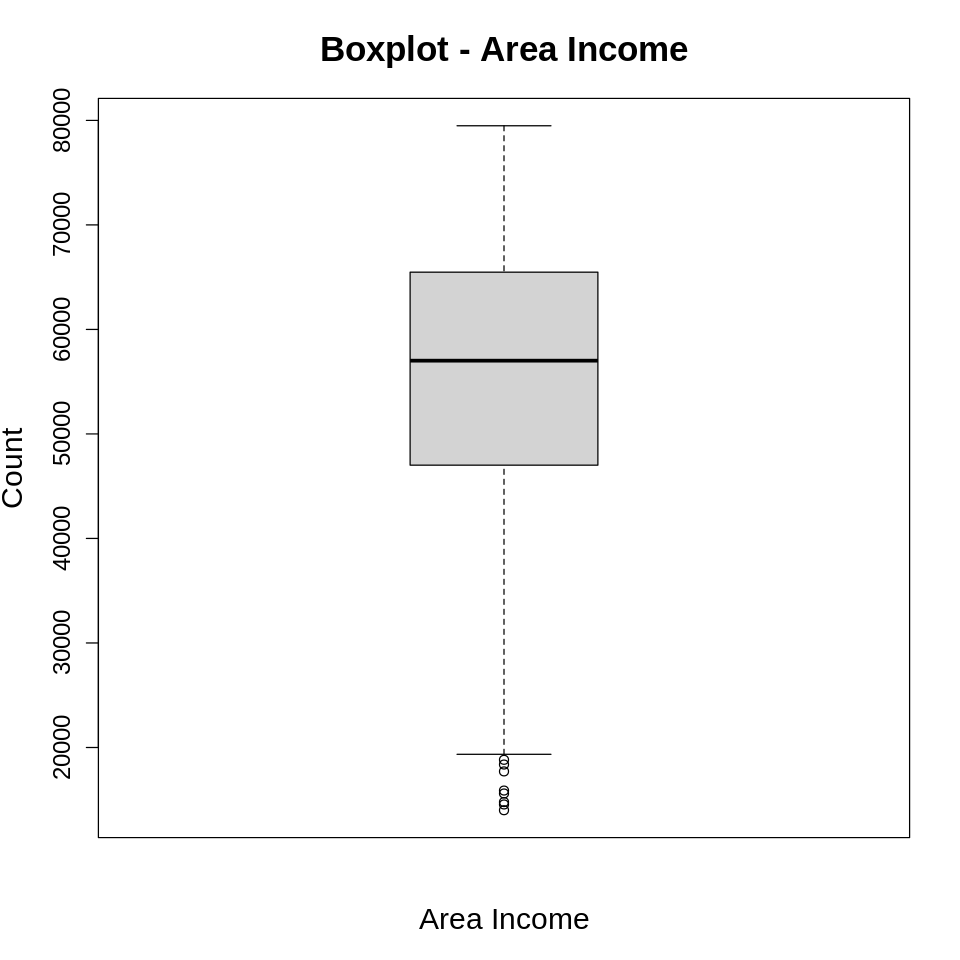

In [ ]:
# Outliers in the area income column

options(repr.plot.width = 8, repr.plot.height = 8)
boxplot(ad_sep$Area.Income, main="Boxplot - Area Income", xlab = "Area Income", ylab = "Count",
boxwex=0.5, cex.main= 1.75, cex.lab=1.5, cex.axis=1.2)

# There are a few outliers in the area income column but I will not get rid of them because
# There are no obvious anomalies.

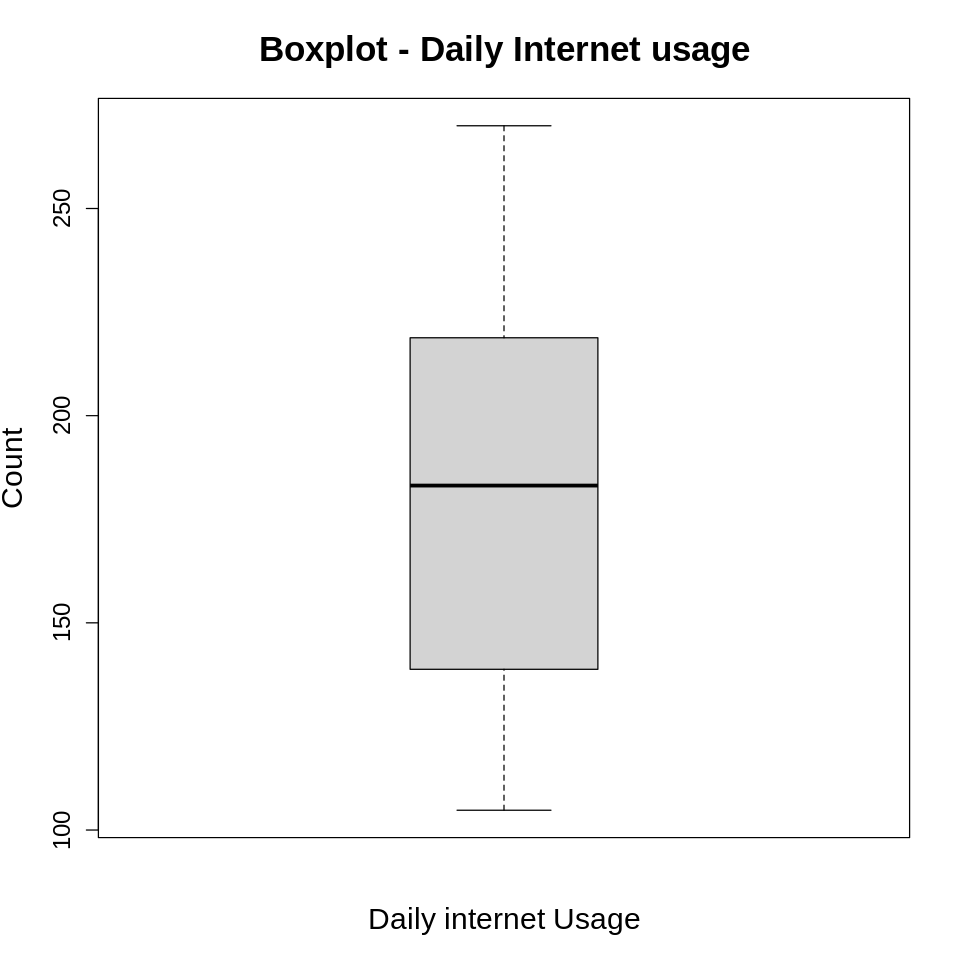

In [ ]:
# Outliers in the internet usage column

options(repr.plot.width = 8, repr.plot.height = 8)
boxplot(ad_sep$Daily.Internet.Usage, main="Boxplot - Daily Internet usage", xlab = "Daily internet Usage", ylab = "Count",
boxwex=0.5, cex.main= 1.75, cex.lab=1.5, cex.axis=1.2)

# There are no outliers in this column

# 6. Exploratory Data Analysis

## a) Univariate Analysis

In [ ]:
colnames(ad_sep)

[1] "Daily.Time.Spent.on.Site" "Age"                     
[3] "Area.Income"              "Daily.Internet.Usage"    
[5] "Male"                     "Country"                 
[7] "Timestamp"                "Clicked.on.Ad"           
[9] "Hour"

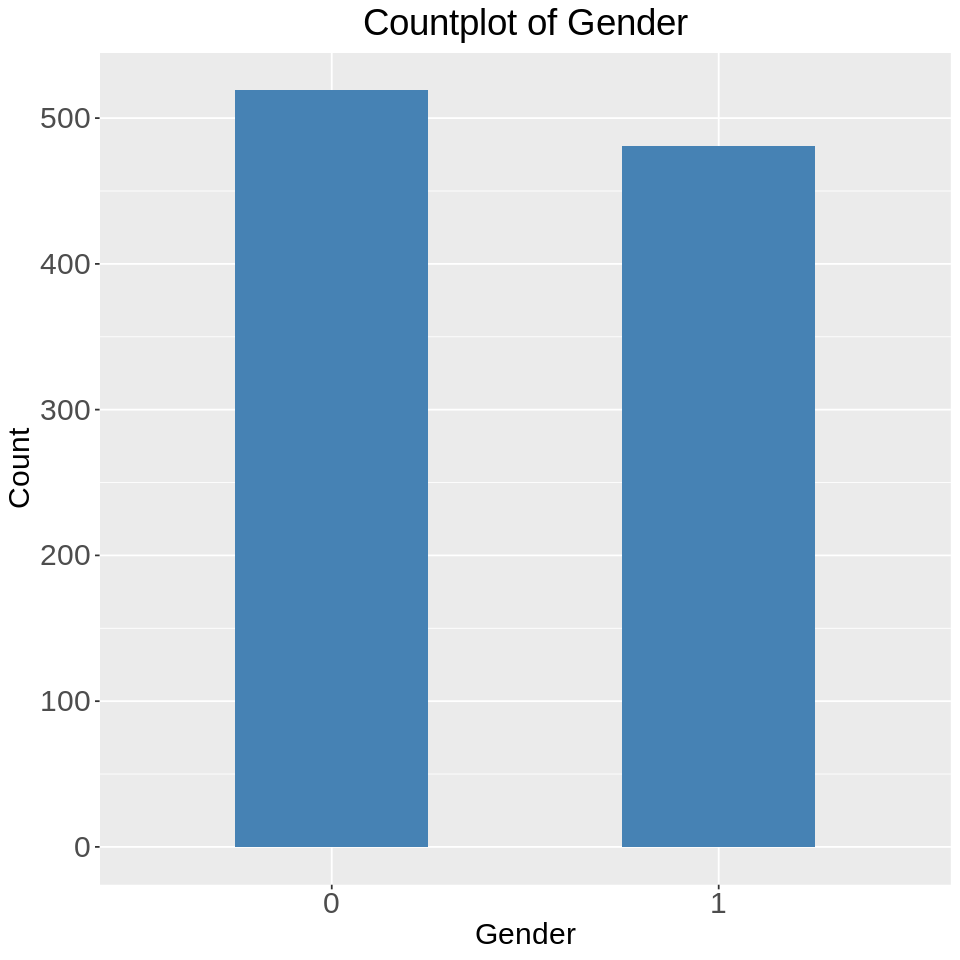

In [ ]:
# Gender countplot(0 represents female and 1 represents male)

options(repr.plot.width = 8, repr.plot.height = 8)
p = ad_sep %>% ggplot(aes(x = factor(Male)))

p + geom_bar(fill = "steelblue", width = 0.5) +
    labs(title = "Countplot of Gender", x = "Gender", y = "Count") +
    theme(axis.text = element_text(size=18),
          axis.title = element_text(size = 18),
          plot.title = element_text(hjust = 0.5, size = 22))

# More females than males visit the blog site

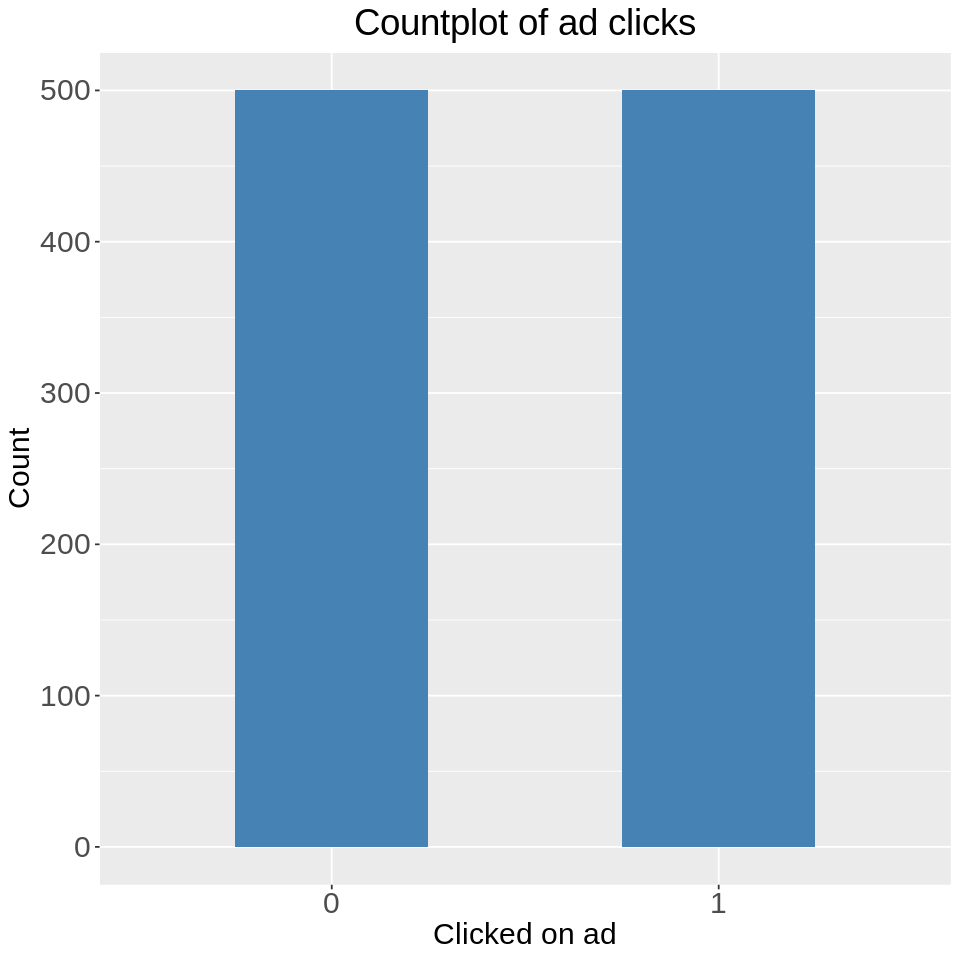

In [ ]:
# Countplot of the ad clicks

options(repr.plot.width = 8, repr.plot.height = 8)
p = ad_sep %>% ggplot(aes(x = factor(Clicked.on.Ad)))

p + geom_bar(fill = "steelblue", width = 0.5) +
    labs(title = "Countplot of ad clicks", x = "Clicked on ad", y = "Count") +
    theme(axis.text = element_text(size=18),
          axis.title = element_text(size = 18),
          plot.title = element_text(hjust = 0.5, size = 22))

# The number of those who clicked the ads are equal
# to those who did not click the ads

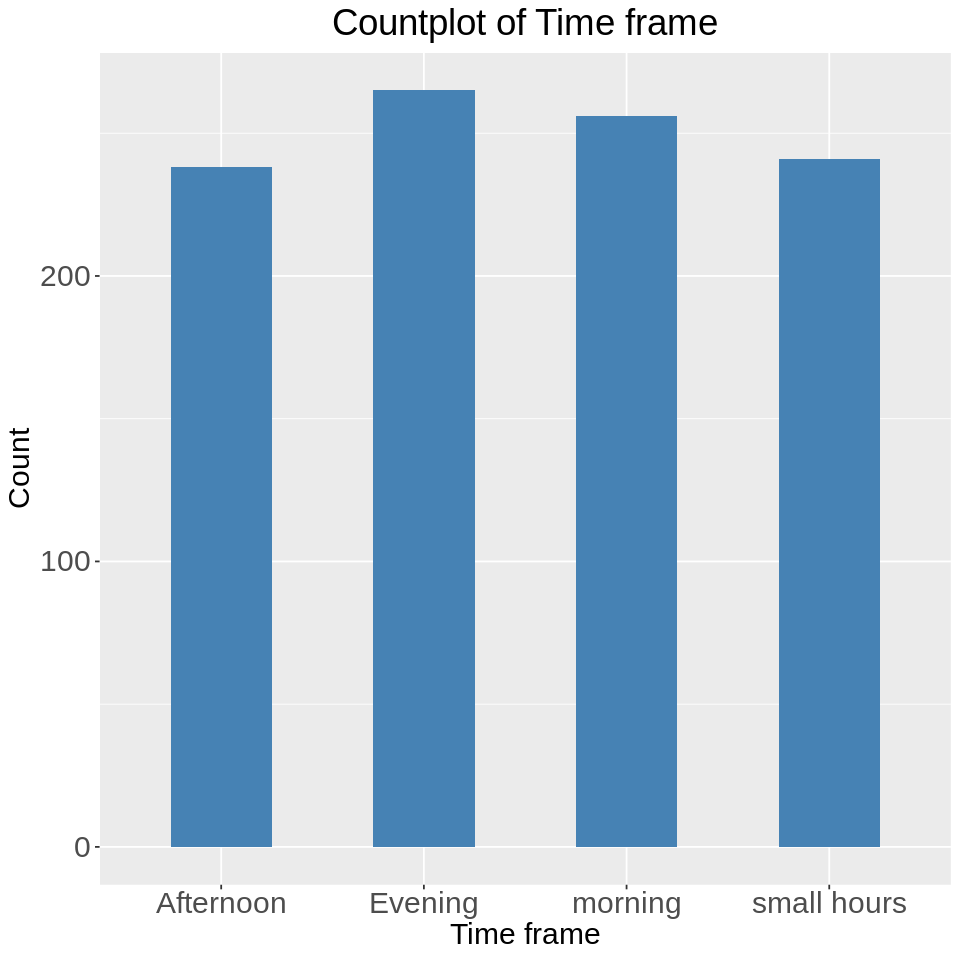

In [ ]:
# Countplot of hour when people visited the website

options(repr.plot.width = 8, repr.plot.height = 8)
p = ad_sep %>% ggplot(aes(x = factor(Hour)))

p + geom_bar(fill = "steelblue", width = 0.5) +
    labs(title = "Countplot of Time frame", x = "Time frame", y = "Count") +
    theme(axis.text = element_text(size=18),
          axis.title = element_text(size = 18),
          plot.title = element_text(hjust = 0.5, size = 22))

# Most users visited the site in the evening i.e 
# between 6pm and midnight.

In [ ]:
# Frequency table for country

table(ad_sep$Country)


                                        Afghanistan 
                                                  8 
                                            Albania 
                                                  7 
                                            Algeria 
                                                  6 
                                     American Samoa 
                                                  5 
                                            Andorra 
                                                  2 
                                             Angola 
                                                  4 
                                           Anguilla 
                                                  6 
       Antarctica (the territory South of 60 deg S) 
                                                  3 
                                Antigua and Barbuda 
                                                  5 
                                          Arg

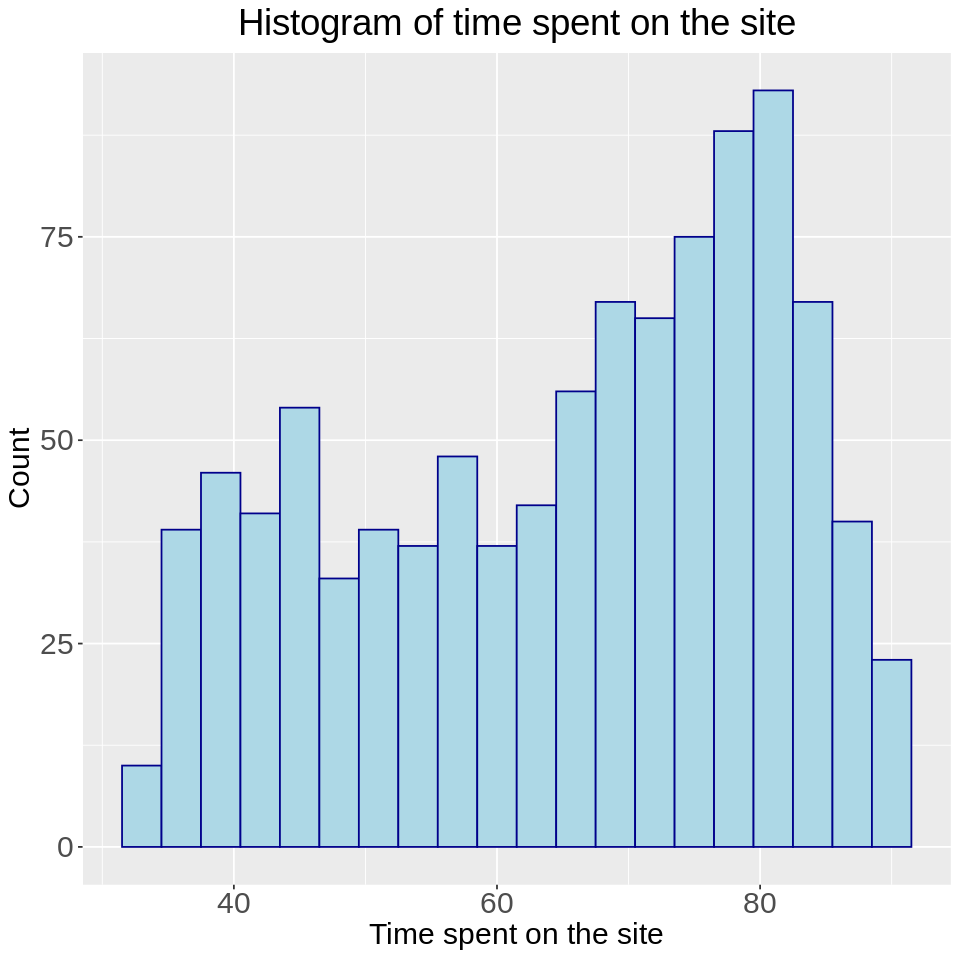

In [ ]:
# Histogram of time spent on the site

options(repr.plot.width = 8, repr.plot.height = 8)
p = ad_sep %>% ggplot(aes(x = Daily.Time.Spent.on.Site ))

p + geom_histogram(color="darkblue", fill="lightblue", binwidth = 3) +
    labs(title = "Histogram of time spent on the site", x = "Time spent on the site", y = "Count") +
    theme(axis.text = element_text(size=18),
          axis.title = element_text(size = 18),
          plot.title = element_text(hjust = 0.5, size = 22))

In [ ]:
# Getting a summary of the measures of central tendancy and dispersion

summary(ad_sep$Daily.Time.Spent.on.Site)

# On average, users spend 65 minutes on the site.
# The maximum number of minutes spent on the sit is 91.4 
# while the minimum is 32.6

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  32.60   51.36   68.22   65.00   78.55   91.43 

In [ ]:
# Obtaining the skewness and kurtosis

print(skewness(ad_sep$Daily.Time.Spent.on.Site))
print(kurtosis(ad_sep$Daily.Time.Spent.on.Site))

# The distribution is slightly leptokurtic and slightly negatively skewed

[1] -0.370646
[1] -1.099864


In [ ]:
# Obtaining the range, IQR, variance and standard deviation

range <- max(ad_sep$Daily.Time.Spent.on.Site) - min(ad_sep$Daily.Time.Spent.on.Site)
cat("Range:", range, "\n")
cat("IQR:", IQR(ad_sep$Daily.Time.Spent.on.Site), "\n")
cat("Variance:", var(ad_sep$Daily.Time.Spent.on.Site), "\n")
cat("Standard Deviation:", sd(ad_sep$Daily.Time.Spent.on.Site), "\n")
cat("Coefficient:", sd(ad_sep$Daily.Time.Spent.on.Site)/ mean(ad_sep$Daily.Time.Spent.on.Site))

# The coefficient of variation is less than 1 therefore
# the time spent on site does not vary much

Range: 58.83 
IQR: 27.1875 
Variance: 251.3371 
Standard Deviation: 15.85361 
Coefficient: 0.243901

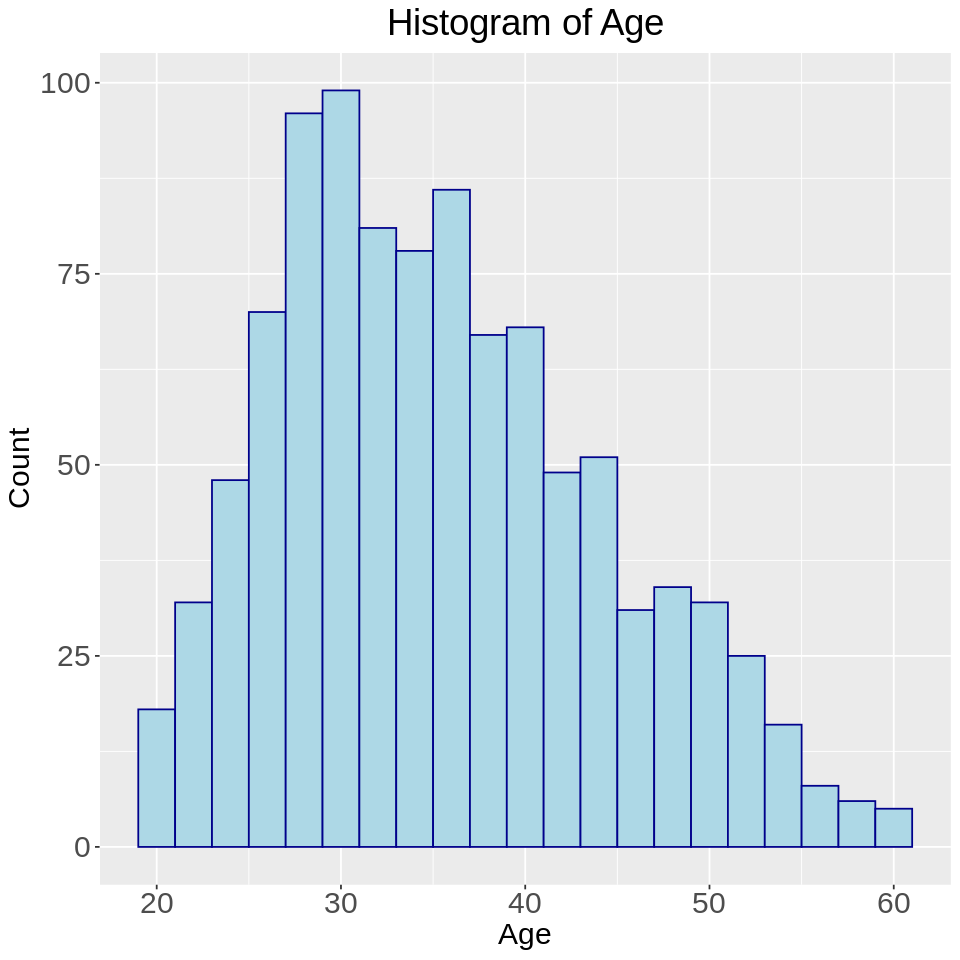

In [ ]:
# Histogram of Age

options(repr.plot.width = 8, repr.plot.height = 8)
p = ad_sep %>% ggplot(aes(x = Age))

p + geom_histogram(color="darkblue", fill="lightblue", binwidth = 2) +
    labs(title = "Histogram of Age", x = "Age", y = "Count") +
    theme(axis.text = element_text(size=18),
          axis.title = element_text(size = 18),
          plot.title = element_text(hjust = 0.5, size = 22))

In [ ]:
# Summary of measures of central tendancy and dispersion

summary(ad_sep$Age)

# The average age of people on the site is 36
# The maximum age is 61 and the minimum age is 19

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  19.00   29.00   35.00   36.01   42.00   61.00 

In [ ]:
# Obtaining the skewness and kurtosis

print(skewness(ad_sep$Age))
print(kurtosis(ad_sep$Age))

# The distribution is leptokurtic and slightly
# positively skewed

[1] 0.4777052
[1] -0.4097066


In [ ]:
# Obtaining the range, IQR, variance and standard deviation

range <- max(ad_sep$Age) - min(ad_sep$Age)
cat("Range:", range, "\n")
cat("IQR:", IQR(ad_sep$Age), "\n")
cat("Variance:", var(ad_sep$Age), "\n")
cat("Standard Deviation:", sd(ad_sep$Age), "\n")
cat("Coefficient:", sd(ad_sep$Age)/ mean(ad_sep$Age))

# The coefficient of variation is less than 1 therefore
# the time spent on site does not vary much

Range: 42 
IQR: 13 
Variance: 77.18611 
Standard Deviation: 8.785562 
Coefficient: 0.2439824

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



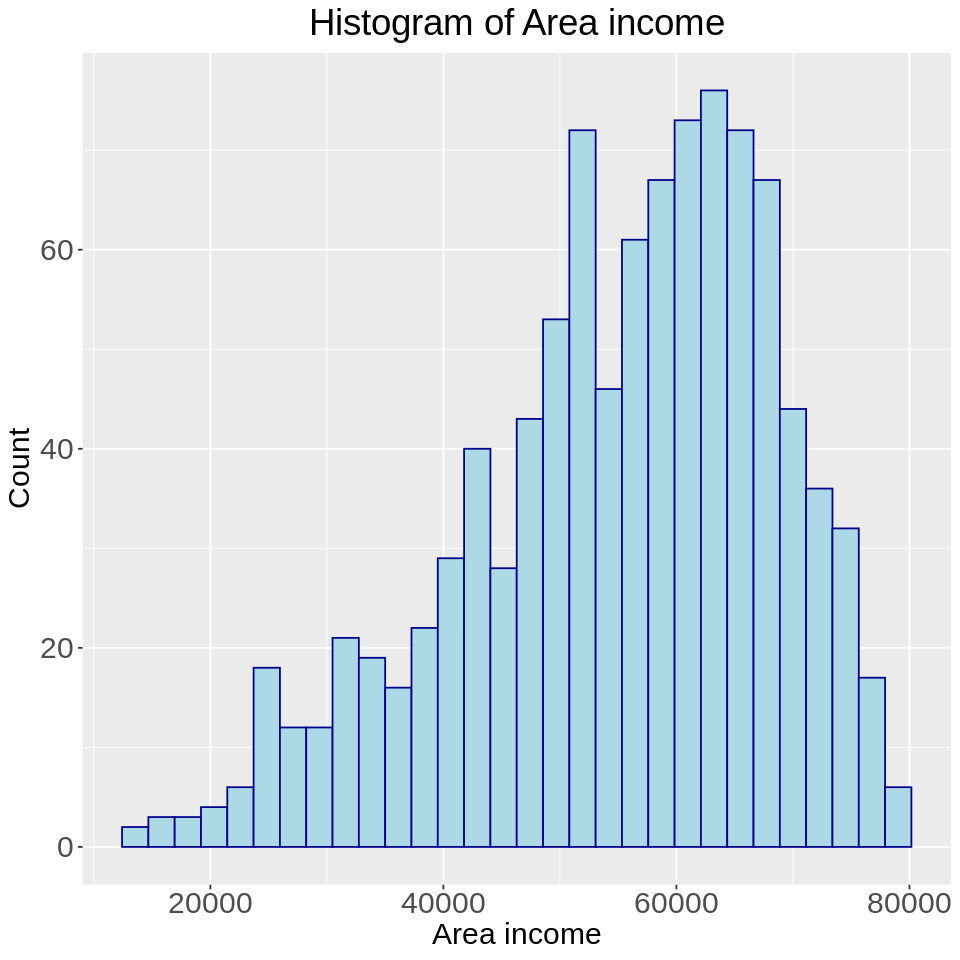

In [ ]:
# Histogram of Area income

options(repr.plot.width = 8, repr.plot.height = 8)
p = ad_sep %>% ggplot(aes(x = Area.Income))

p + geom_histogram(color="darkblue", fill="lightblue") +
    labs(title = "Histogram of Area income", x = "Area income", y = "Count") +
    theme(axis.text = element_text(size=18),
          axis.title = element_text(size = 18),
          plot.title = element_text(hjust = 0.5, size = 22))

In [ ]:
# Summary of measures of central tendancy and dispersion

summary(ad_sep$Area.Income)

# The average area income is 55000
# The maximum income sh 79465 is 61 and the minimum income is 13996

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  13996   47032   57012   55000   65471   79485 

In [ ]:
# Obtaining the skewness and kurtosis

print(skewness(ad_sep$Area.Income))
print(kurtosis(ad_sep$Area.Income))

# The distribution is leptokurtic and slightly negatively skewed 

[1] -0.6484229
[1] -0.1110924


In [ ]:
# Obtaining the range, IQR, variance and standard deviation

range <- max(ad_sep$Area.Income) - min(ad_sep$Area.Income)
cat("Range:", range, "\n")
cat("IQR:", IQR(ad_sep$Area.Income), "\n")
cat("Variance:", var(ad_sep$Area.Income), "\n")
cat("Standard Deviation:", sd(ad_sep$Area.Income), "\n")
cat("Coefficient:", sd(ad_sep$Area.Income)/ mean(ad_sep$Area.Income))

# The coefficient of variation is less than 1 therefore
# the time spent on site does not vary much

Range: 65488.3 
IQR: 18438.83 
Variance: 179952406 
Standard Deviation: 13414.63 
Coefficient: 0.2439024

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



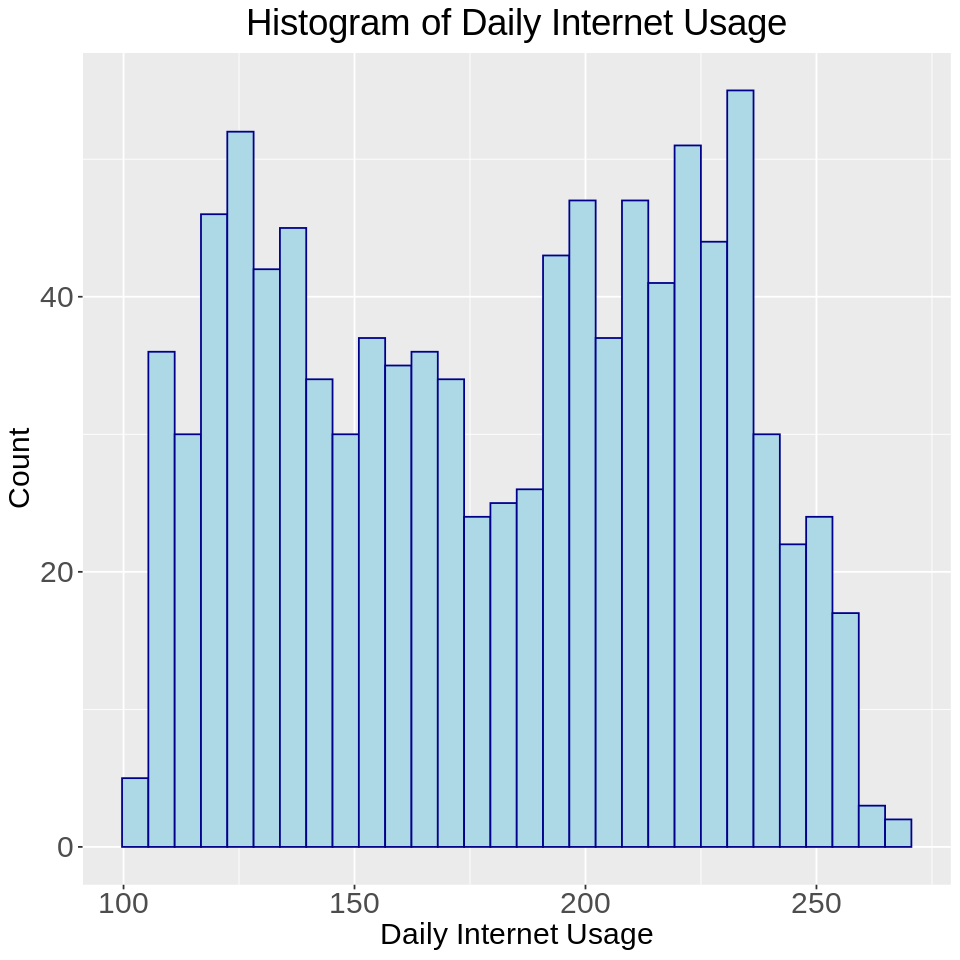

In [ ]:
# Histogram of Daily Internet Usage

options(repr.plot.width = 8, repr.plot.height = 8)
p = ad_sep %>% ggplot(aes(x = Daily.Internet.Usage))

p + geom_histogram(color="darkblue", fill="lightblue") +
    labs(title = "Histogram of Daily Internet Usage", x = "Daily Internet Usage", y = "Count") +
    theme(axis.text = element_text(size=18),
          axis.title = element_text(size = 18),
          plot.title = element_text(hjust = 0.5, size = 22))

In [ ]:
# Summary of measures of central tendancy and dispersion

summary(ad_sep$Daily.Internet.Usage)

# The average daily internet usage was 180 mb
# The maximum daily internet usage is 270 mb and the minimum daily internet usage is 104.8 mb

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  104.8   138.8   183.1   180.0   218.8   270.0 

In [ ]:
# Obtaining the skewness and kurtosis

print(skewness(ad_sep$Daily.Internet.Usage))
print(kurtosis(ad_sep$Daily.Internet.Usage))

# The distribution is slightly leptokurtic and
# generally follows a normal distribution

[1] -0.03343681
[1] -1.275752


In [ ]:
# Obtaining the range, IQR, variance and standard deviation

range <- max(ad_sep$Daily.Internet.Usage) - min(ad_sep$Daily.Internet.Usage)
cat("Range:", range, "\n")
cat("IQR:", IQR(ad_sep$Daily.Internet.Usage), "\n")
cat("Variance:", var(ad_sep$Daily.Internet.Usage), "\n")
cat("Standard Deviation:", sd(ad_sep$Daily.Internet.Usage), "\n")
cat("Coefficient:", sd(ad_sep$Daily.Internet.Usage)/ mean(ad_sep$Daily.Internet.Usage))

# The coefficient of variation is less than 1 therefore
# the time spent on site does not vary much

Range: 165.18 
IQR: 79.9625 
Variance: 1927.415 
Standard Deviation: 43.90234 
Coefficient: 0.2439017

## b) Bivariate Analysis

In [ ]:
colnames(ad_sep)

[1] "Daily.Time.Spent.on.Site" "Age"                     
[3] "Area.Income"              "Daily.Internet.Usage"    
[5] "Male"                     "Country"                 
[7] "Timestamp"                "Clicked.on.Ad"           
[9] "Hour"

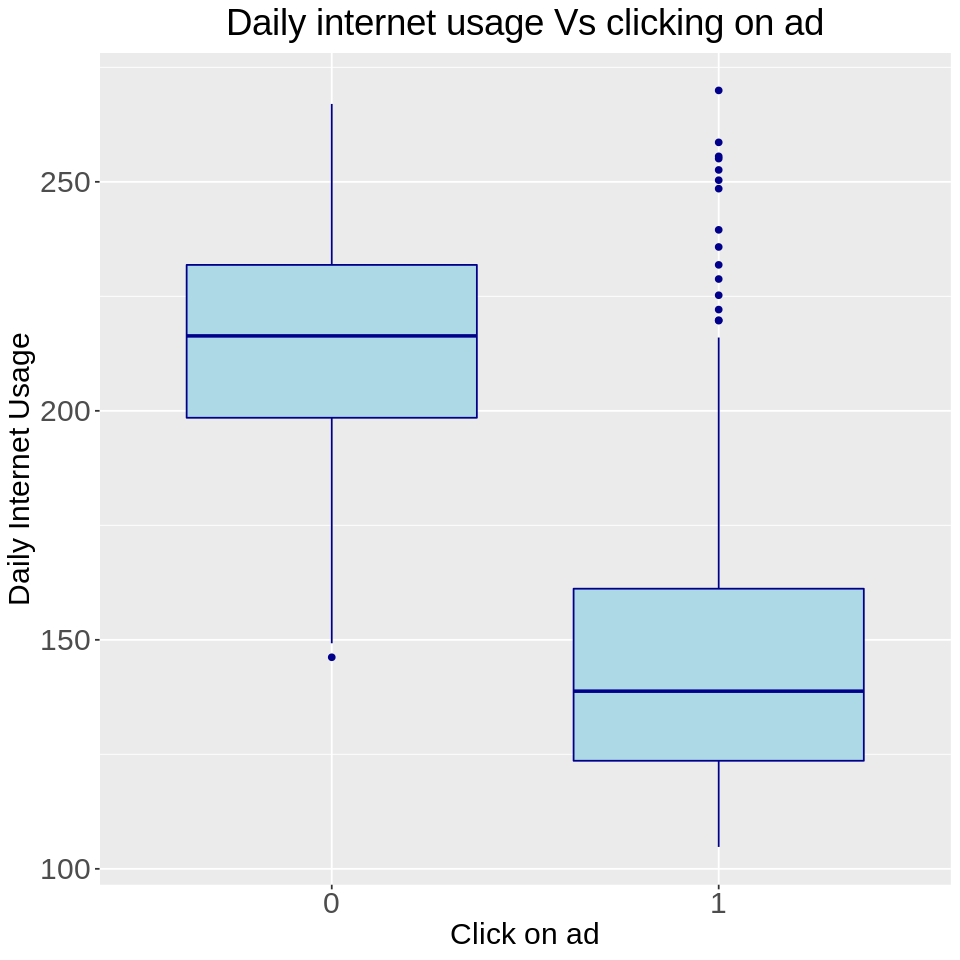

In [ ]:
# Relationship between daily internet usage and clicking on an ad

options(repr.plot.width = 8, repr.plot.height = 8)
p = ad_sep %>% ggplot(aes(x= factor(Clicked.on.Ad), y = Daily.Internet.Usage))

p + geom_boxplot(color="darkblue", fill="lightblue") +
    labs(title = "Daily internet usage Vs clicking on ad", x = "Click on ad", y = "Daily Internet Usage") +
    theme(axis.text = element_text(size=18),
          axis.title = element_text(size = 18),
          plot.title = element_text(hjust = 0.5, size = 22))

# The median daily internet usage of those who clicked on the ad was a lot less
# than the median daily internet usage for those who did not click on the ad

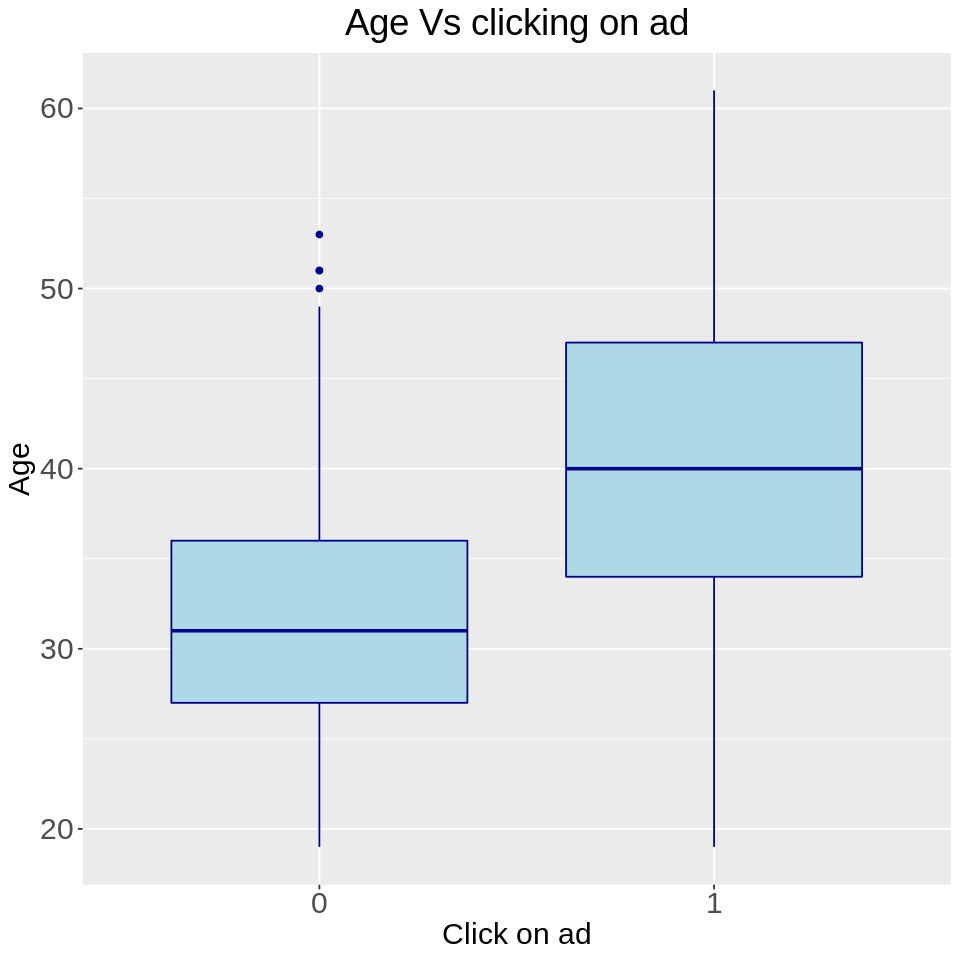

In [ ]:
# Relationship between age and clicking on an ad

options(repr.plot.width = 8, repr.plot.height = 8)
p = ad_sep %>% ggplot(aes(x= factor(Clicked.on.Ad), y = Age))

p + geom_boxplot(color="darkblue", fill="lightblue") +
    labs(title = "Age Vs clicking on ad", x = "Click on ad", y = "Age") +
    theme(axis.text = element_text(size=18),
          axis.title = element_text(size = 18),
          plot.title = element_text(hjust = 0.5, size = 22))

# The median age of those who clicked on the ad is approximately 40 years
# while the median age for those who did not click in the ad is approximately 31 years

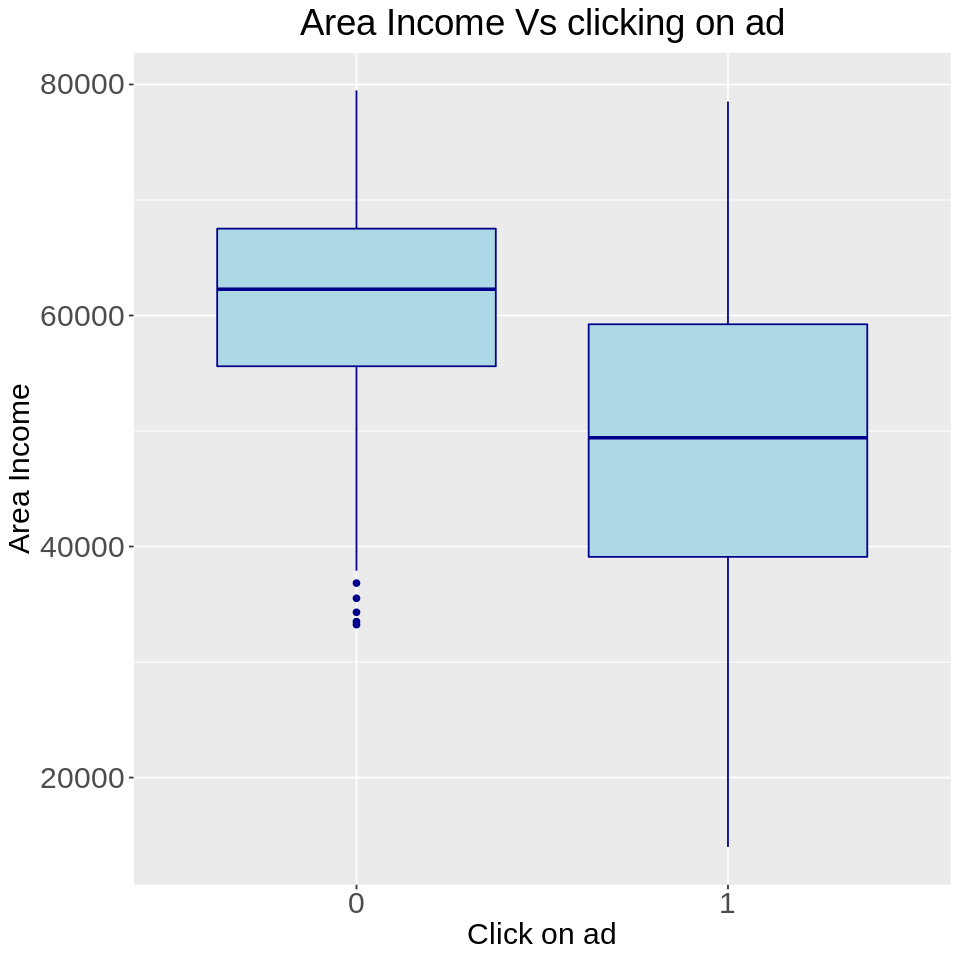

In [ ]:
# Relationship between area income and clicking on an ad

options(repr.plot.width = 8, repr.plot.height = 8)
p = ad_sep %>% ggplot(aes(x= factor(Clicked.on.Ad), y = Area.Income))

p + geom_boxplot(color="darkblue", fill="lightblue") +
    labs(title = "Area Income Vs clicking on ad", x = "Click on ad", y = "Area Income") +
    theme(axis.text = element_text(size=18),
          axis.title = element_text(size = 18),
          plot.title = element_text(hjust = 0.5, size = 22))

# The median area income of those who clicked on the ad is approximately sh.50,000
# while the median area income for those who did not click in the ad is approx. sh.63,000

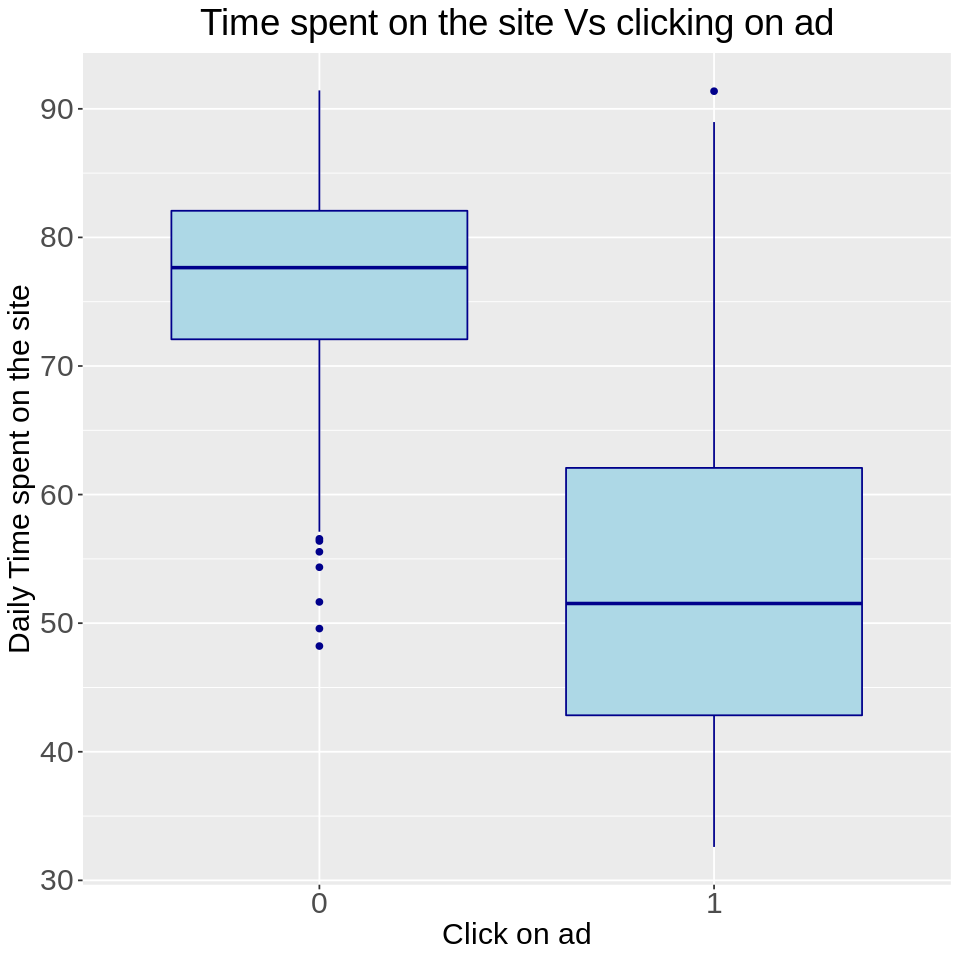

In [ ]:
# Relationship between area income and clicking on an ad

options(repr.plot.width = 8, repr.plot.height = 8)
p = ad_sep %>% ggplot(aes(x= factor(Clicked.on.Ad), y = Daily.Time.Spent.on.Site))

p + geom_boxplot(color="darkblue", fill="lightblue") +
    labs(title = "Time spent on the site Vs clicking on ad", x = "Click on ad", y = "Daily Time spent on the site") +
    theme(axis.text = element_text(size=18),
          axis.title = element_text(size = 18),
          plot.title = element_text(hjust = 0.5, size = 22))

# The median time spent on the site of those who clicked on the ad is approx. 52 minutes
# while the median time spent on the site for those who did not click in the ad is approx. 77 minutes

In [ ]:
# Changing the Clicked on ad column to character in order to plot the grouped bar graphs

ad_sep$Clicked.on.Ad <- as.character(ad_sep$Clicked.on.Ad)

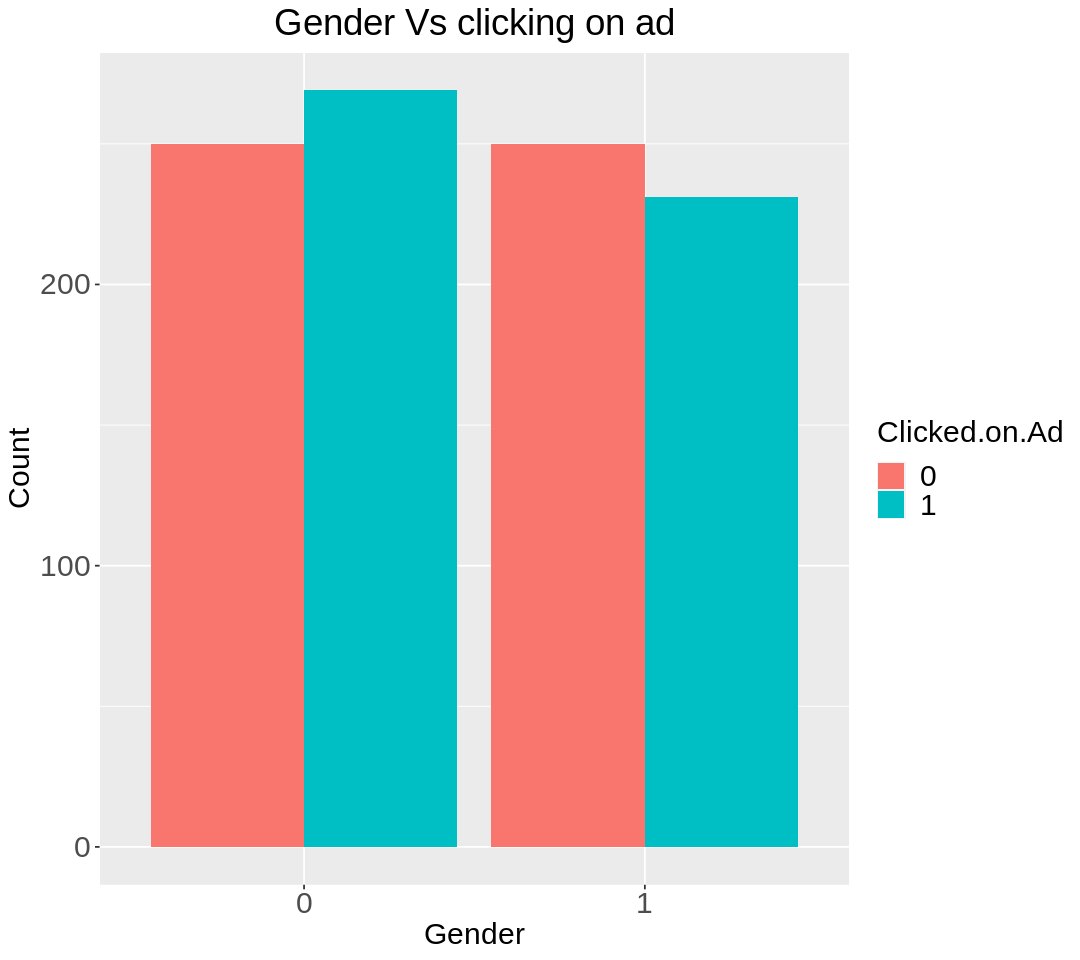

In [ ]:
# Relationship between gender and clicking on an ad (0 is female and 1 is male)

options(repr.plot.width = 9, repr.plot.height = 8)
ggplot(ad_sep, aes(x = factor(Male), fill = Clicked.on.Ad)) + 
  geom_bar(position = "dodge") + 
  labs(title = "Gender Vs clicking on ad", x = "Gender", y = "Count") +
    theme(axis.text = element_text(size=18),
          axis.title = element_text(size = 18),
          plot.title = element_text(hjust = 0.5, size = 22),
          legend.title = element_text(size=18),
          legend.text = element_text(size=18))

# More females clicked on the ads than males

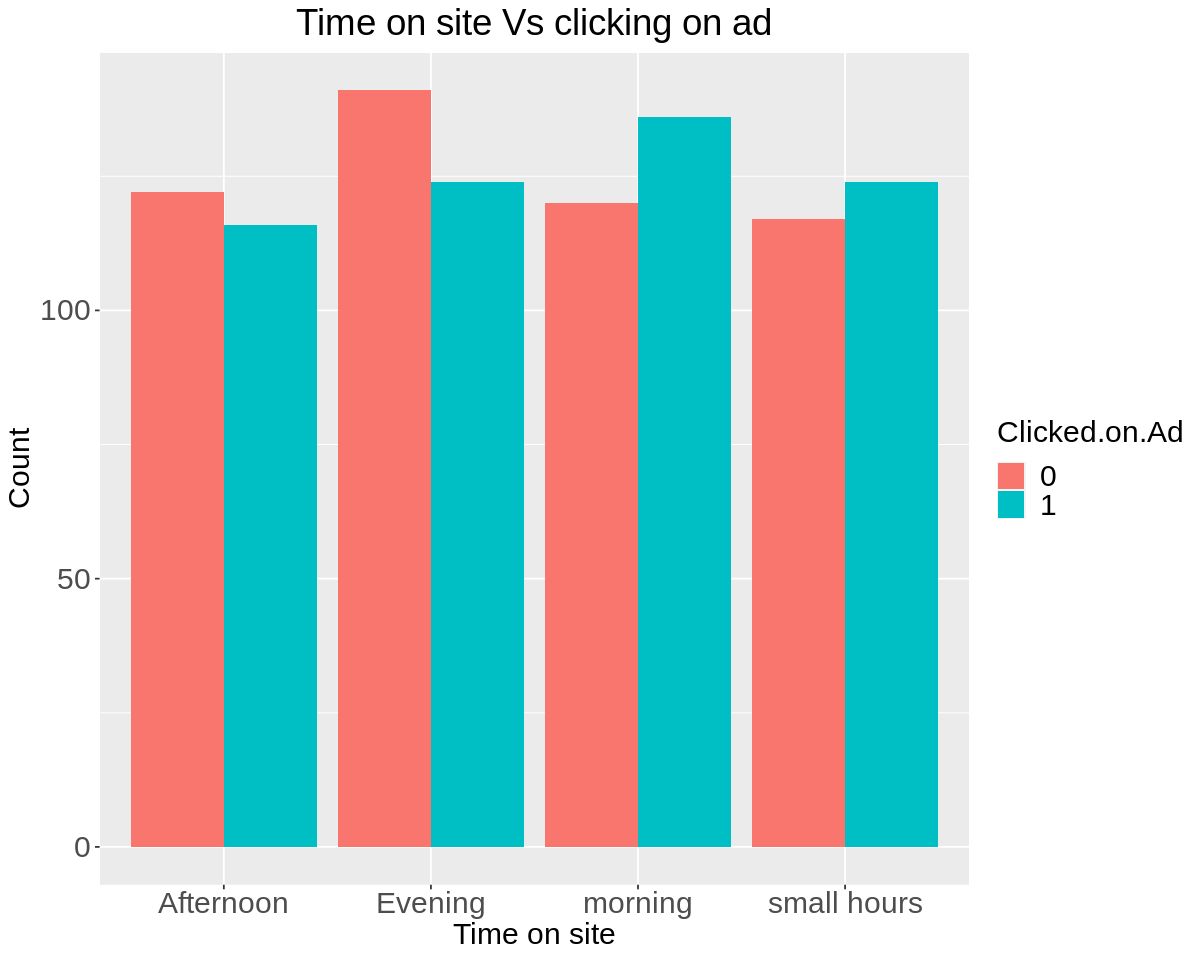

In [ ]:
# Relationship between the time a user is on the site and clicking on an ad 

options(repr.plot.width = 10, repr.plot.height = 8)
ggplot(ad_sep, aes(x = factor(Hour), fill = Clicked.on.Ad)) + 
  geom_bar(position = "dodge") + 
  labs(title = "Time on site Vs clicking on ad", x = "Time on site", y = "Count") +
    theme(axis.text = element_text(size=18),
          axis.title = element_text(size = 18),
          plot.title = element_text(hjust = 0.5, size = 22),
          legend.title = element_text(size=18),
          legend.text = element_text(size=18))

# Most people clicked on the ads in the morning hours i.e
# between 6am and noon.

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



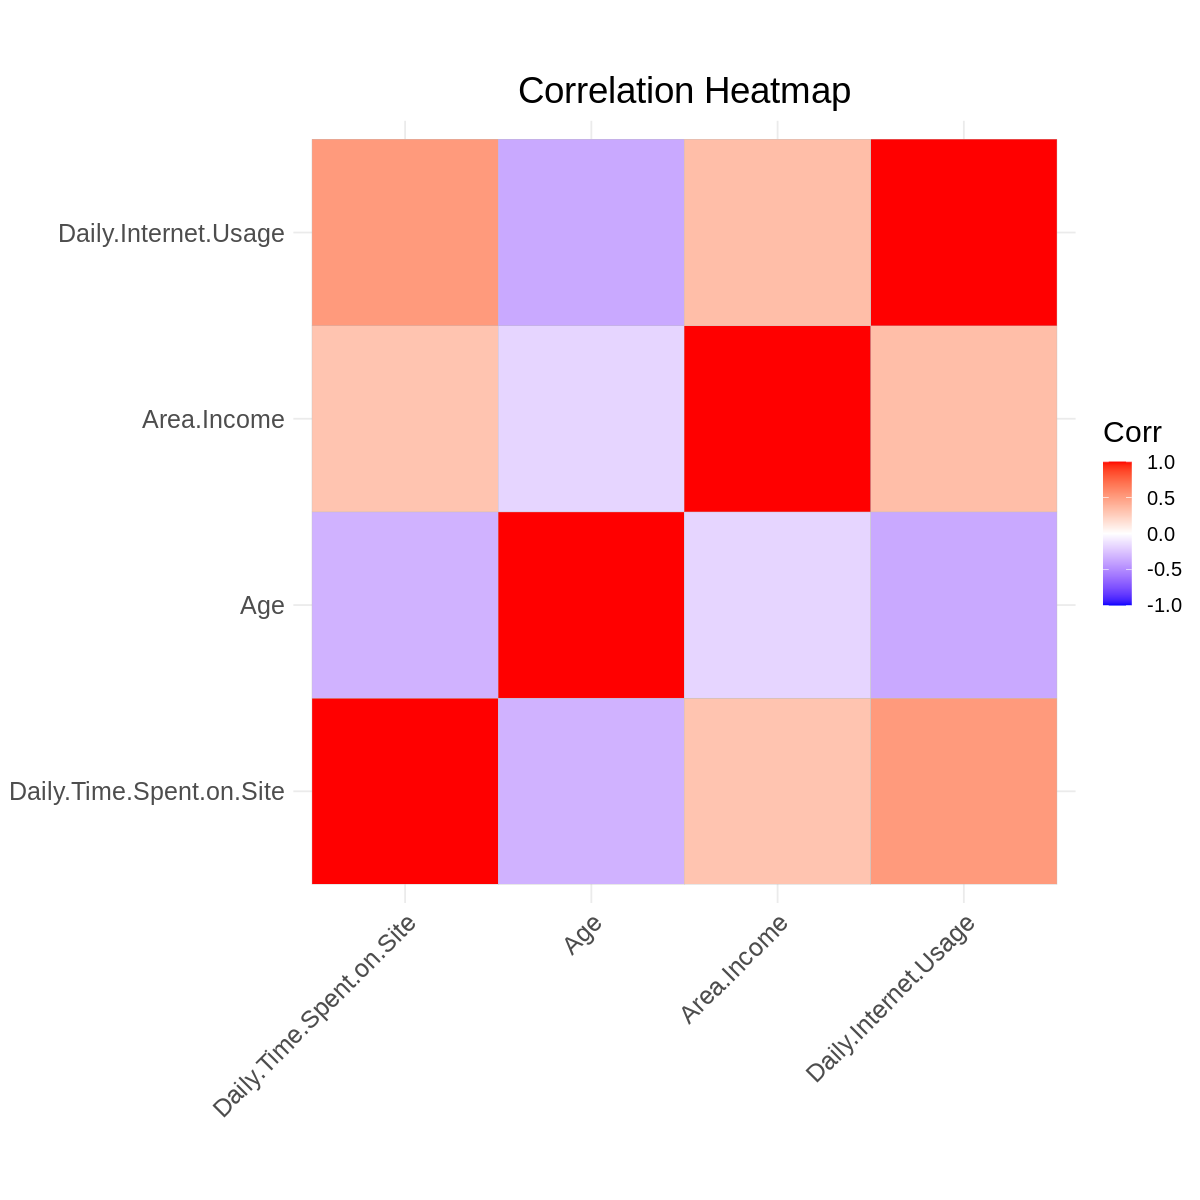

In [ ]:
# Correlation heatmap

# Filtering the numerical columns only and obtaining the correlation
corr <- cor(ad_sep[ , 1:4])

# Installing and loading the packages
install.packages("ggcorrplot")
library(ggcorrplot)

# Creating the correlation heatmap
options(repr.plot.width = 10, repr.plot.height = 10)
ggcorrplot(corr, tl.cex = 15) + 
  labs(title = "Correlation Heatmap") +
    theme(axis.title = element_text(size = 18),
          plot.title = element_text(hjust = 0.5, size = 22),
          legend.title = element_text(size=18),
          legend.text = element_text(size=12))


In [ ]:
# Installing GGally package

install.packages("GGally")
library("GGally")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘reshape’


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



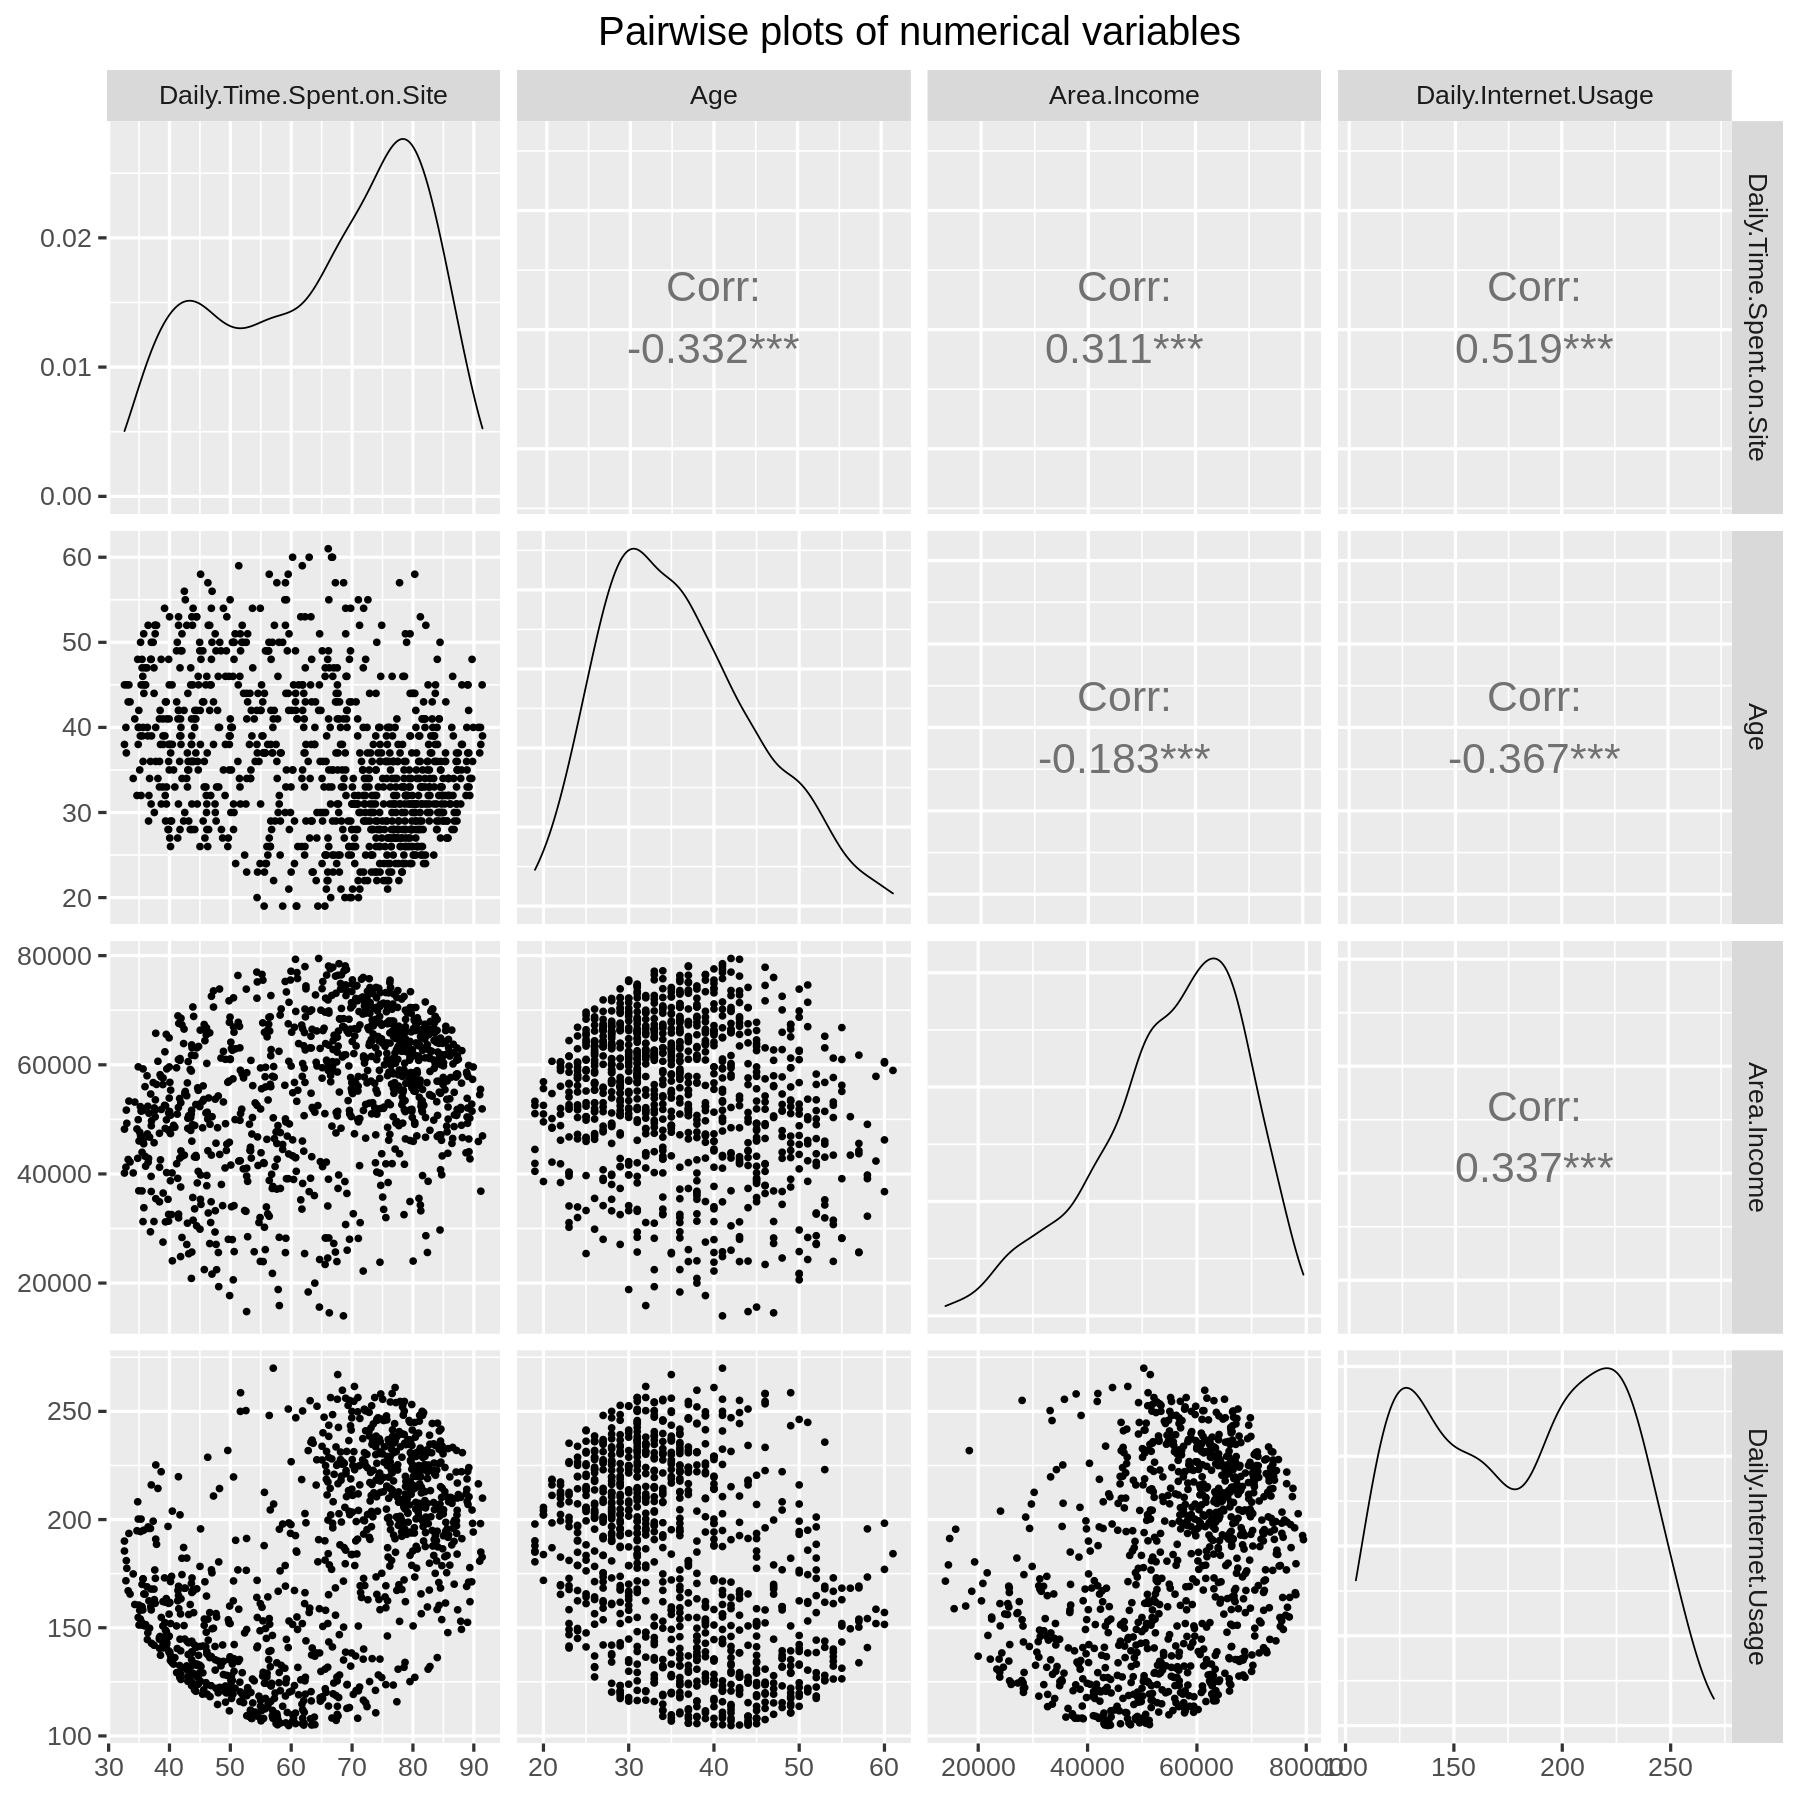

In [ ]:
# Creating scatterplots of the numeric variables

df_num = ad_sep[ , 1:4]

options(repr.plot.width = 15, repr.plot.height = 15)
ggpairs(df_num, upper = list(continuous = wrap("cor", size = 9))) + 
labs(title = "Pairwise plots of numerical variables") +
    theme_grey(base_size = 20) +
    theme(plot.title = element_text(hjust = 0.5))

# There is a relatively strong correlation between daily internet usage 
# and daily time spent on the site
# There is a notable negative correlation betweem age and daily internet usage
# There is a notable positive correlation between area income and daily internet usage 

In [ ]:
# Getting the country from which most people who click on the ads are from
# Filtering the clicked on ad == "1" and putting it in a table

clickedads <- ad_sep %>% filter(Clicked.on.Ad == "1")
click_country <- table(clickedads$Country)

# Changing the table to a data table and ordering it
new_df = data.table(click_country)

new_df[order(-N), ]



V1,N
<chr>,<int>
Australia,7
Ethiopia,7
Turkey,7
Liberia,6
Liechtenstein,6
South Africa,6
Afghanistan,5
France,5
Hungary,5


### Recommendations for effectively performing bivariate analysis while working on the current problem.

In order to effectively perform bivariate analysis, most time should be spent analyzing all the variables of interest against the Clicked on ad variable. 
This will help determine who would most likely click on the ad

# Implementing the solution

## KNN

In [ ]:
# Preview of the dataset

head(ad_sep)

,Daily.Time.Spent.on.Site,Age,Area.Income,Daily.Internet.Usage,Male,Country,Timestamp,Clicked.on.Ad,Hour
,<dbl>,<int>,<dbl>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>
1,68.95,35,61833.90,256.09,0,Tunisia,2016-03-27 00:53:11,0,small hours
2,80.23,31,68441.85,193.77,1,Nauru,2016-04-04 01:39:02,0,small hours
3,69.47,26,59785.94,236.50,0,San Marino,2016-03-13 20:35:42,0,Evening
4,74.15,29,54806.18,245.89,1,Italy,2016-01-10 02:31:19,0,small hours
5,68.37,35,73889.99,225.58,0,Iceland,2016-06-03 03:36:18,0,small hours
6,59.99,23,59761.56,226.74,1,Norway,2016-05-19 14:30:17,0,Afternoon


In [ ]:
# Dropping the timestamp and country columns

ad_sep = select(ad_sep, -c(Timestamp, Country))
head(ad_sep)

,Daily.Time.Spent.on.Site,Age,Area.Income,Daily.Internet.Usage,Male,Clicked.on.Ad,Hour
,<dbl>,<int>,<dbl>,<dbl>,<int>,<chr>,<chr>
1,68.95,35,61833.90,256.09,0,0,small hours
2,80.23,31,68441.85,193.77,1,0,small hours
3,69.47,26,59785.94,236.50,0,0,Evening
4,74.15,29,54806.18,245.89,1,0,small hours
5,68.37,35,73889.99,225.58,0,0,small hours
6,59.99,23,59761.56,226.74,1,0,Afternoon


In [ ]:
# Encoding the Hour column

ad_sep$Hour = ifelse(ad_sep$Hour == "small hours", 0,
              ifelse(ad_sep$Hour == "morning", 1,
              ifelse(ad_sep$Hour == "Afternoon", 2,3)))

head(ad_sep)

,Daily.Time.Spent.on.Site,Age,Area.Income,Daily.Internet.Usage,Male,Clicked.on.Ad,Hour
,<dbl>,<int>,<dbl>,<dbl>,<int>,<chr>,<dbl>
1,68.95,35,61833.90,256.09,0,0,0
2,80.23,31,68441.85,193.77,1,0,0
3,69.47,26,59785.94,236.50,0,0,3
4,74.15,29,54806.18,245.89,1,0,0
5,68.37,35,73889.99,225.58,0,0,0
6,59.99,23,59761.56,226.74,1,0,2


In [ ]:
# Converting the clicked on ad column into a factor

ad_sep$Clicked.on.Ad = as.factor(ad_sep$Clicked.on.Ad)
str(ad_sep)

'data.frame':	1000 obs. of  7 variables:
 $ Daily.Time.Spent.on.Site: num  69 80.2 69.5 74.2 68.4 ...
 $ Age                     : int  35 31 26 29 35 23 33 48 30 20 ...
 $ Area.Income             : num  61834 68442 59786 54806 73890 ...
 $ Daily.Internet.Usage    : num  256 194 236 246 226 ...
 $ Male                    : int  0 1 0 1 0 1 0 1 1 1 ...
 $ Clicked.on.Ad           : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 2 1 1 ...
 $ Hour                    : num  0 0 3 0 0 2 3 0 1 0 ...


In [ ]:
# splitting into train and test

set.seed(123)
split = initial_split(ad_sep, prop = 0.7)
train = training(split)
test = testing(split)

In [ ]:
# Looking at the dimensions of the train and test data

dim(train)
dim(test)

[1] 700   7

[1] 300   7

In [ ]:
# Making the model

trctrl = trainControl(method = "repeatedcv", number = 10, repeats = 3 )
knn <- train(Clicked.on.Ad ~., train, method = "knn", trControl = trctrl, preProcess = c("center", "scale"), tuneLength = 10 )

# Using predict() method to predict the results

pred = predict(knn, newdata = test)

# Obtaining the confusion matrix

confusionMatrix(pred, test$Clicked.on.Ad)

# The models accuracy is at 95%
# 12 users who clicked on the ads were misclassified as having not clicked on the ads. This misclassification
# needs to be reduced
# 3 users who had not clicked on the ads were classified as having clicked on the ads

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 151  12
         1   3 134
                                          
               Accuracy : 0.95            
                 95% CI : (0.9189, 0.9717)
    No Information Rate : 0.5133          
    P-Value [Acc > NIR] : < 2e-16         
                                          
                  Kappa : 0.8998          
                                          
 Mcnemar's Test P-Value : 0.03887         
                                          
            Sensitivity : 0.9805          
            Specificity : 0.9178          
         Pos Pred Value : 0.9264          
         Neg Pred Value : 0.9781          
             Prevalence : 0.5133          
         Detection Rate : 0.5033          
   Detection Prevalence : 0.5433          
      Balanced Accuracy : 0.9492          
                                          
       'Positive' Class : 0               
                              

In [ ]:
# Tuning the parameters

search_grid = expand.grid(
  k = seq(1, 25, by = 2)
)

# Checking if there will be anything new

knn <- train(Clicked.on.Ad ~., train, 
            method = "knn",
            trControl = trctrl,
            preProcess = c("center", "scale"),
            tuneGrid = search_grid )

In [ ]:
# Checking how the model did

knn$results %>% 
    top_n(5, wt = Accuracy) %>%
    arrange(desc(Accuracy))

# The highest accuracy after tuning is 96.37% with k = 5

k,Accuracy,Kappa,AccuracySD,KappaSD
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5,0.9637644,0.9275655,0.02189312,0.04374819
7,0.9632884,0.9266100,0.02218549,0.04434096
9,0.9623495,0.9247370,0.02338173,0.04672426
11,0.9580225,0.9160905,0.02531764,0.05059436
13,0.9570771,0.9142017,0.02616907,0.05228787


# Challenging the solution

## SVM

### Linear SVM

In [ ]:
# Building the model

trctrl <- trainControl(method = "repeatedcv", number = 10, repeats = 3)

svm_Linear <- train(Clicked.on.Ad ~., data = train, method = "svmLinear",
                    trControl=trctrl,
                    preProcess = c("center", "scale"),
                    tuneLength = 10)

# Using predict() method to predict the results

pred = predict(svm_Linear, newdata = test)

# Obtaining the confusion matrix

confusionMatrix(pred, test$Clicked.on.Ad)

# The model's accuracy is at 97.33%
# 7 users who clicked on the ads were misclassified as having not clicked on the ads.
# 1 user who had not clicked on the ads were classified as having clicked on the ads

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 153   7
         1   1 139
                                          
               Accuracy : 0.9733          
                 95% CI : (0.9481, 0.9884)
    No Information Rate : 0.5133          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.9466          
                                          
 Mcnemar's Test P-Value : 0.0771          
                                          
            Sensitivity : 0.9935          
            Specificity : 0.9521          
         Pos Pred Value : 0.9563          
         Neg Pred Value : 0.9929          
             Prevalence : 0.5133          
         Detection Rate : 0.5100          
   Detection Prevalence : 0.5333          
      Balanced Accuracy : 0.9728          
                                          
       'Positive' Class : 0               
                              

### Radial SVM

In [ ]:
# Building the model

trctrl <- trainControl(method = "repeatedcv", number = 10, repeats = 3)

svm_Radial <- train(Clicked.on.Ad ~., data = train, method = "svmRadial",
                    trControl=trctrl,
                    preProcess = c("center", "scale"),
                    tuneLength = 10)

# Using predict() method to predict the results

pred = predict(svm_Radial, newdata = test)

# Obtaining the confusion matrix

confusionMatrix(pred, test$Clicked.on.Ad)

# The model's accuracy is at 97%
# 8 users who clicked on the ads were misclassified as having not clicked on the ads.
# 1 user who had not clicked on the ads were classified as having clicked on the ads

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 153   8
         1   1 138
                                          
               Accuracy : 0.97            
                 95% CI : (0.9438, 0.9862)
    No Information Rate : 0.5133          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.9399          
                                          
 Mcnemar's Test P-Value : 0.0455          
                                          
            Sensitivity : 0.9935          
            Specificity : 0.9452          
         Pos Pred Value : 0.9503          
         Neg Pred Value : 0.9928          
             Prevalence : 0.5133          
         Detection Rate : 0.5100          
   Detection Prevalence : 0.5367          
      Balanced Accuracy : 0.9694          
                                          
       'Positive' Class : 0               
                              

### Polynomial SVM

## Decision Trees

In [ ]:
# Installing the Ranger package

install.packages("ranger")
library(ranger)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘RcppEigen’




In [ ]:
# Building the model

model <- train(Clicked.on.Ad ~., data = train, method = "ranger",
                    trControl=trctrl,
                    preProcess = c("center", "scale"),
                    tuneLength = 10)

# Using predict() method to predict the results

pred = predict(model, newdata = test)

# Obtaining the confusion matrix

confusionMatrix(pred, test$Clicked.on.Ad)

# The model's accuracy is at 96.33%
# 8 users who clicked on the ads were misclassified as having not clicked on the ads.
# 3 users who had not clicked on the ads were classified as having clicked on the ads

note: only 5 unique complexity parameters in default grid. Truncating the grid to 5 .



Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 151   8
         1   3 138
                                          
               Accuracy : 0.9633          
                 95% CI : (0.9353, 0.9816)
    No Information Rate : 0.5133          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.9265          
                                          
 Mcnemar's Test P-Value : 0.2278          
                                          
            Sensitivity : 0.9805          
            Specificity : 0.9452          
         Pos Pred Value : 0.9497          
         Neg Pred Value : 0.9787          
             Prevalence : 0.5133          
         Detection Rate : 0.5033          
   Detection Prevalence : 0.5300          
      Balanced Accuracy : 0.9629          
                                          
       'Positive' Class : 0               
                              

In [ ]:
# Hyperparemeter tuming

set.seed(42)
myGrid <- expand.grid(mtry = c(5, 10, 20, 40, 60),
                     splitrule = c("gini", "extratrees"),
                     min.node.size = 10)

model <- train(Clicked.on.Ad ~., data = train, method = "ranger",
                    trControl=trctrl,
                    tuneGrid = myGrid,
                    preProcess = c("center", "scale"),
                    tuneLength = 10)


In [ ]:
# Checking how the model did

model$results %>% 
    top_n(5, wt = Accuracy) %>%
    arrange(desc(Accuracy))

# The accuracy was 96.1 after tuning

mtry,splitrule,min.node.size,Accuracy,Kappa,AccuracySD,KappaSD
<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5,gini,10,0.9619068,0.9238027,0.02403425,0.04808371
5,extratrees,10,0.9533141,0.9066533,0.02210017,0.04418025


# Conclusions
From the analysis done the conclusions that can be made are as follows:

- The Linear SVM model performed better than the rest of the models with an accuracy of 97.33%
- The median daily internet usage of those who clicked on the ad was a lot less than the median daily internet usage for those who did not click on the ad. When we consider the age of those who clicked on the ad, it may be that the older users are maybe too busy to spend a lot of time reading blogs or they are just not as tech-savvy as the younger users hence do not consume alot of data
- The median age of those who clicked on the ad is approximately 40 years while the median age for those who did not click in the ad is approximately 31 years. This shows that those interested in classes related to cryptography are in the older age bracket.
- The median area income of those who clicked on the ad is approximately sh.50,000 while the median area income for those who did not click in the ad is approx. sh.63,000. It could be that those with low area incomes may click on the ads because they are keen to expand their skill set so that they can get better paying jobs.
- The median time spent on the site of those who clicked on the ad is approx. 52 minutes while the median time spent on the site for those who did not click in the ad is approx. 77 minutes. It is also important to note that there is a negetive correlation between time spent on the site and the age. Those who are older may spend less time on the site because they may not have time to stay on the site.
- More females clicked on the ad than males
- Most people clicked on the ads in the morning hours i.e between 6am and noon.
- Australia, Ethiopia and Turkey had the highest number of people clicking on the ads. However, the difference between the countries is not big.

# Recommendations
In light of the conclusions made, the following recommendations can be made:

- Considering that those clicking on the ads earn a comparatively low median income, the course offered should not cost much. The fee should be set considering the pay range of these individuals.
- Evening classes or morning classes should be considered as a strong option. Since those who clicked on the ads are of an older age bracket, we can assume that they have many responsibilities and may not have time to attend classes the whole day.
- If it is found that most of these individuals are not tech savvy, consider tailoring the course from beginner stage to accommodate those individuals.